In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels import api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Индекс FTSE 100 (UKX Index)

In [247]:
indexes = pd.read_excel('data.xlsx', sheet_name='static')
indexes = indexes.set_index("Dates")
ukx = indexes["UKX Index"]
ukx.describe()

count    10123.000000
mean      5005.501395
std       1944.278784
min       1221.700000
25%       3221.550000
50%       5478.810000
75%       6551.105000
max       8559.560000
Name: UKX Index, dtype: float64

In [248]:
ukx.resample("YE").last().pct_change(fill_method=None).describe()

count    40.000000
mean      0.055882
std       0.140346
min      -0.313266
25%      -0.032663
50%       0.075828
75%       0.144623
max       0.351124
Name: UKX Index, dtype: float64

<Axes: xlabel='Dates'>

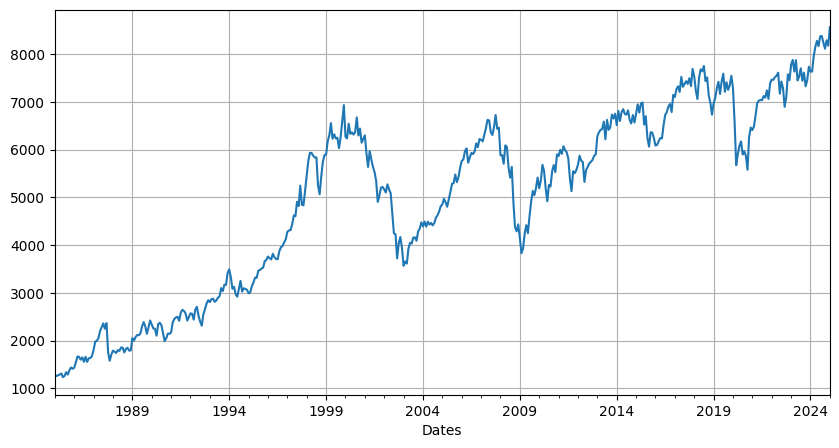

In [249]:
ukx.resample("ME").last().plot(figsize=(10, 5), grid=1)

In [250]:
macro = pd.read_excel('Macro econ inputs.xlsx', sheet_name='UK')
macro = macro.set_index("Dates")
macro.index = pd.to_datetime(macro.index)

rename_dict = {
    'UKBRBASE Index': 'Policy Rate',
    'GTGBP2Y Govt': 'UK2y',
    'GTGBP10Y Govt': 'UK10y',
    'GTGBPII5Y Govt': 'UK 5Y Inf Prot',
    'GTGBP5Y Govt': 'UK 5yr',
    'UKRPCJYR Index': 'UK Infl',
    'UKIPIMOM Index': 'Industrial Production',
    'UKGRABIQ Index': 'UK GDP',
    'UKUEILOR Index': 'UK Unemployment rate',
    'UKAWA2FD Index': 'UK Real average hourly earning',
    'EHBBGB Index': 'UK Budget Balance',
    'UKTBALEE Index': 'UK Trade Balance',
    'ECOXUKS Index': 'UK Nominal GDP',
    'UKCCINFL Index': 'UK Inflation Expectations Index'
}
macro = macro.rename(columns=rename_dict)
macro.describe()

,Policy Rate,UK2y,UK10y,UK 5Y Inf Prot,UK 5yr,UK Infl,Industrial Production,UK GDP,UK Unemployment rate,UK Real average hourly earning,UK Budget Balance,UK Trade Balance,UK Nominal GDP,UK Inflation Expectations Index
count,224.000000,136.000000,136.000000,75.000000,136.000000,148.000000,224.000000,223.000000,220.000000,104.000000,120.000000,224.000000,223.000000,120.000000
mean,6.304375,3.454667,4.109191,-0.910360,3.786124,2.831757,0.174554,0.534081,6.620000,101.174038,-4.187083,-5020.857143,1644.018072,76.375000
std,4.523348,2.635393,2.327559,1.537431,2.496200,2.136818,1.600455,2.029313,2.376494,5.150964,3.162317,5465.297935,1097.998784,13.871598
min,0.100000,-0.173400,0.170500,-3.342000,-0.090700,0.000000,-7.400000,-19.900000,3.400000,87.900000,-15.090000,-23711.000000,0.000000,42.000000
25%,3.187500,0.651775,2.011500,-2.228500,1.358350,1.500000,-0.600000,0.200000,4.775000,98.600000,-5.527500,-8833.000000,562.455000,67.000000
50%,5.750000,4.013350,4.354850,-1.283000,4.149400,2.400000,0.150000,0.600000,5.600000,101.650000,-3.490000,-2265.500000,1562.650000,74.000000
75%,9.880000,5.359875,5.140425,0.194000,5.364525,3.325000,0.900000,0.900000,8.125000,104.225000,-2.527500,-779.250000,2708.280000,85.250000
max,17.000000,10.250000,9.870000,2.313000,10.080000,10.700000,10.700000,17.000000,11.900000,110.500000,2.100000,544.000000,3930.420000,122.000000


#### 1й вариант

In [251]:
macro1 = macro[["Policy Rate", "UK10y", "UK 5yr", "UK Infl", "Industrial Production", "UK GDP", "UK Unemployment rate", "UK Trade Balance"]]
macro1 = macro1.dropna()
macro1["Policy Rate"] = macro1["Policy Rate"].pct_change()
macro1["UK Unemployment rate"] = macro1["UK Unemployment rate"].pct_change()

In [252]:
ukx = ukx.resample("QE").last().pct_change().dropna()
ukx

Dates
1985-06-30   -0.032968
1985-09-30    0.044619
1985-12-31    0.095039
1986-03-31    0.181368
1986-06-30   -0.011385
                ...   
2024-03-31    0.028368
2024-06-30    0.026595
2024-09-30    0.008921
2024-12-31   -0.007761
2025-03-31    0.047295
Freq: QE-DEC, Name: UKX Index, Length: 160, dtype: float64

In [253]:
merged_data = pd.merge(macro1, ukx, on='Dates', how='inner').dropna()
X = merged_data[["Policy Rate", "UK10y", "UK 5yr", "UK Infl", "Industrial Production", "UK GDP", "UK Unemployment rate", "UK Trade Balance"]]
y = merged_data['UKX Index']
X = sm.add_constant(X)

In [254]:
merged_data

,Policy Rate,UK10y,UK 5yr,UK Infl,Industrial Production,UK GDP,UK Unemployment rate,UK Trade Balance,UKX Index
Dates,,,,,,,,,
1992-06-30,-0.048170,9.1600,9.2500,4.3,1.1,-0.2,0.010309,-962,0.033236
1992-09-30,-0.101215,8.9700,8.5000,3.2,0.7,0.5,0.010204,-957,0.012613
1992-12-31,-0.225225,8.2530,7.3680,2.7,-0.1,0.8,0.050505,-1733,0.114963
1993-03-31,-0.145349,7.7570,6.9180,2.4,-0.9,0.5,0.019231,-986,0.011312
1993-06-30,0.000000,7.6230,6.8370,2.5,-0.7,0.4,-0.018868,-968,0.007399
...,...,...,...,...,...,...,...,...,...
2024-03-31,0.000000,3.9317,3.8208,3.5,1.1,0.8,0.102564,-15755,0.028368
2024-06-30,0.000000,4.1717,4.0196,2.1,0.1,0.6,-0.023256,-18683,0.026595
2024-09-30,-0.047619,4.0022,3.8571,2.0,0.0,0.2,0.023810,-14838,0.008921


In [255]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              UKX Index   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     3.802
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           0.000509
Time:                        19:01:41   Log-Likelihood:                 177.53
No. Observations:                 132   AIC:                            -337.1
Df Residuals:                     123   BIC:                            -311.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0282      0.028     -1.005      0.317      -0.084       0.027
Policy Rate               0.0236      0.025      0.939      0.349      -0.026       0.073
UK10y                     0.0265      0.015      1.772      0.079      -0.003       0.056
UK 5yr                   -0.0209      0.013     -1.556      0.122      -0.047       0.006
UK Infl                  -0.0010      0.004     -0.236      0.813      -0.010       0.007
Industrial Production     0.0171      0.004      4.235      0.000       0.009       0.025
UK GDP                    0.0038      0.003      1.425      0.157      -0.001       0.009
UK Unemployment rate     -0.3205      0.151     -2.125      0.036      -0.619      -0.022
UK Trade Balance      -1.021e-06   2.04e-06     -0.502      0.617   -5.05e-06    3.01e-06
==============================================================================
Omnibus:                        6.048   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                9.563
Skew:                          -0.072   Prob(JB):                      0.00838
Kurtosis:                       4.311   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""